In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

##### 1.We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”,identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing.
##### [Hint: Refer to LabelEncoder documentation in scikit-learn]

In [35]:
df_voices = pd.read_csv("voice.csv")
df_voices.head()

df_voices["label"] = df_voices["label"].map({"male":"0", "female":"1"})

X = df_voices
Y = df_voices["label"]


In [36]:
df_voices.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [37]:
X.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

##### 2.Fit a logistic regression model and measure the accuracy on the test set.
##### [Hint:Refer to Linear Models section in scikit-learn]

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 10, test_size = 0.20) 
ln_model = LogisticRegression(max_iter=1000)
ln_model.fit(train_x, train_y)

predicted_data = ln_model.predict(test_x)

metrics.accuracy_score(predicted_data, test_y)

1.0

In [39]:
X.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

##### 3.Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated.  Plot the correlation matrix using seaborn heatmap.
##### [Hint: Explore dataframe methods to identify appropriate method]

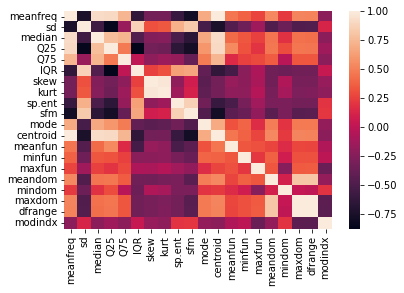

In [40]:
corr = df_voices.corr()

sns.heatmap(corr)
plt.show()

##### 4.Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.
##### [Hint:Identify correlated variable pairs and remove one among them]

##### strong correlated columns So that we can keep
##### "meanfreq" -> "median", "Q25", "centroid"
##### "Q25" -> "centroid"
##### "maxdom" -> "dfrange"

In [41]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [42]:
X = X.drop("median",axis=1)
X = X.drop("Q75",axis=1)
X = X.drop("centroid",axis=1)
X = X.drop("dfrange",axis=1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 10, test_size = 0.20)

ln_model = LogisticRegression(max_iter=1000)
ln_model.fit(train_x, train_y)

predicted_data = ln_model.predict(test_x)

metrics.accuracy_score(predicted_data, test_y)

1.0